<a href="https://colab.research.google.com/github/claraaqn/Calculo-Numerico/blob/main/Atividade%2007%20-%20PVI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Parâmetros do modelo
beta = 0.4    # Coeficiente de transmissão
gamma = 0.035 # Taxa de recuperação

In [ ]:
# Condições iniciais
S0 = 990      # Suscetíveis iniciais
I0 = 10       # Infectados iniciais
R0 = 0        # Recuperados iniciais
N = S0 + I0 + R0  # População total (constante)

In [ ]:
# Parâmetros da simulação
t0 = 0        # Tempo inicial
tf = 60       # Tempo final (dias)
h = 0.1       # Passo de integração

In [ ]:
# Definindo as equações do modelo SIR
def derivadas(t, y):
    S, I, R = y
    dSdt = -(beta/N) * S * I
    dIdt = (beta/N) * S * I - gamma * I
    dRdt = gamma * I
    return np.array([dSdt, dIdt, dRdt])

In [ ]:
# Método de Runge-Kutta de 4ª ordem
def runge_kutta4(t, y, h, derivadas):
    k1 = h * derivadas(t, y)
    k2 = h * derivadas(t + h/2, y + k1/2)
    k3 = h * derivadas(t + h/2, y + k2/2)
    k4 = h * derivadas(t + h, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4)/6

In [ ]:
# Simulação
t = np.arange(t0, tf, h)
n = len(t)
Y = np.zeros((n, 3))
Y[0] = [S0, I0, R0]

for i in range(n-1):
    Y[i+1] = runge_kutta4(t[i], Y[i], h, derivadas)

# Extraindo os resultados
S = Y[:,0]
I = Y[:,1]
R = Y[:,2]

# Encontrando o pico da epidemia
pico_idx = np.argmax(I)
tempo_pico = t[pico_idx]
infectados_pico = I[pico_idx]

# Encontrando quando a epidemia está controlada (I < 1)
controlada_idx = np.where(I < 1)[0]
if len(controlada_idx) > 0:
    tempo_controlada = t[controlada_idx[0]]
else:
    tempo_controlada = None

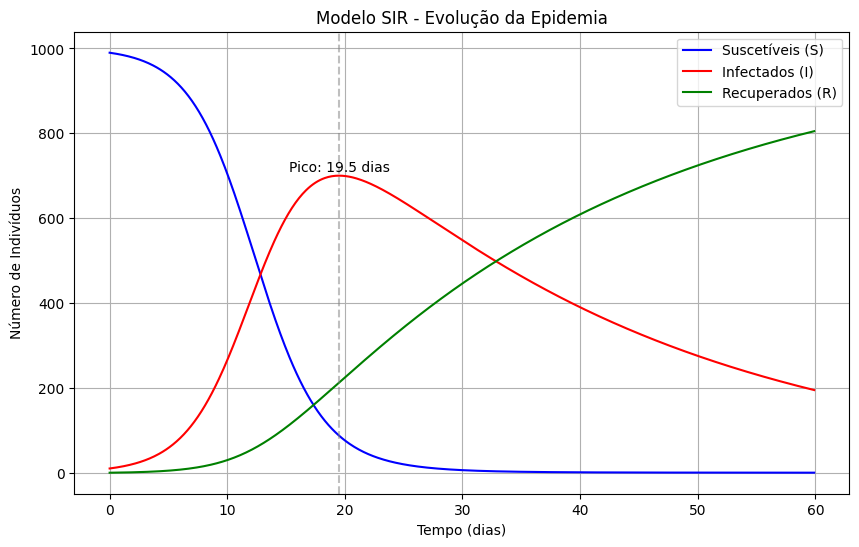

In [ ]:
# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Suscetíveis (S)', color='blue')
plt.plot(t, I, label='Infectados (I)', color='red')
plt.plot(t, R, label='Recuperados (R)', color='green')

# Marcando o pico da epidemia
plt.axvline(x=tempo_pico, color='gray', linestyle='--', alpha=0.5)
plt.text(tempo_pico, infectados_pico+10, f'Pico: {tempo_pico:.1f} dias',
         horizontalalignment='center')

# Marcando quando a epidemia está controlada
if tempo_controlada is not None:
    plt.axvline(x=tempo_controlada, color='gray', linestyle='--', alpha=0.5)
    plt.text(tempo_controlada, 50, f'Controlada: {tempo_controlada:.1f} dias',
             horizontalalignment='center')

plt.title('Modelo SIR - Evolução da Epidemia')
plt.xlabel('Tempo (dias)')
plt.ylabel('Número de Indivíduos')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Exibindo informações importantes
print(f"População total constante: {N} indivíduos")
print(f"Pico da epidemia ocorre em {tempo_pico:.1f} dias com {infectados_pico:.0f} infectados")
if tempo_controlada is not None:
    print(f"A epidemia pode ser considerada controlada após {tempo_controlada:.1f} dias")
else:
    print("A epidemia não está controlada no período simulado")

População total constante: 1000 indivíduos
Pico da epidemia ocorre em 19.5 dias com 700 infectados
A epidemia não está controlada no período simulado
